# Softwarepraktikum -  Lösung zur Programmieraufgabe



Gruppe: Jonathan Wille, Nikolai Mack, Joschka Capone

Student: Joschka Capone

Matrikelnummer: 6565445

E-Mail: joschka.capone@gmail.com



### Problemstellung 2
In dieser Aufgabe wollen wir eine Differentialgleichung zweiter Ordnung sowohl symbolisch als
auch numerisch lösen. Die Differentialgleichung beschreibt die Position beispielsweise einer Hängebrücke, die von der Schwerkraft eine nach unten gerichtete Parabel bildet.


Wir werden im folgenden die meisten physikalischen Maßeinheiten und exakten Größen, wie etwa
Länge der Brücke oder Materialeigenschaften vernachlässigen und annehmen, dass die Position
der Hängebrücke Durch das folgende Randwertproblem gegeben ist:

$$-\frac{d^2u}{dx^2} = g \ \ \textbf{in} \ \ \Omega = (0, 1) \subset \mathbb{R}$$

$$ u(0) = u(1) = 0. $$

Dabei wollen wir annehmen, dass g ≡ −10 in etwa der Gravitationskonstante (nach unten
gerichtet) entspricht.

### Aufgabenteil 3
Symbolische Lösung und deren grafische Darstellung

In [1]:
import sympy as sp

# initiallizing symbolic variable x and symbolic function u
x = sp.symbols('x')
u = sp.Function('u')

# setting up the differential-equation equation.
# g = -10 is pushed to the left hand side of the equation by adding 10 to the original equation,
# so the expression is set to equal zero.
eq = - sp.Derivative(u(x), x, x) + 10

# The function dsolve is called with the arguments (equation, function, initial conditions).
# The equation specifies the differential equation.
# The function specifies for what function dsolve should find a solution.
# The initial conditions specify the starting conditions the solution must respect.
# Here the conditions from the excercise were entered.
sol = sp.dsolve(eq, u(x), ics={u(0): 0, u(1): 0})
# The solution is printed to the console
sol
#The solution obviously fullfills the initial conditions.

Eq(u(x), 5*x**2 - 5*x)

In [2]:
# The solution also fullfills the differential equation, as this little verification script shows
def U(x):
    return 5 * x**2 - 5 * x

- U(x).diff(x, x) == -10

True

### Aufgabenteil 4
Die numerische Lösung mit der Finite-Differenzen Methode.

In [3]:
import numpy as np
from scipy import linalg

# Set the number of points to be approximated with n:
n = 100
# Initialize step-length in x-direction:
h = 1 / n

# Initialize coefficient matrix for forward- and backward-Difference M:
M = np.zeros((n, n))   # Initialize as nxn-matrix with all enries zero

for i in range(0, n):
    M[i, i] = 2    # overwrite the diagonal entries with 2
    if i < n-1:    #overwrite entries in superdiagonal with -1, except last row, because there is no entry there
        M[i, i+1] = -1 
    if i > 0:      # overwrite entries in subdiagonal with -1, except first row, because there is no entry there
        M[i, i-1] = -1

M = M * 1/h**2   # scale the matrix correctly


# Initialize right hand side of equation g:
g = np.ones(n) * (-10)   # initialize all entries of vector as 1 and scale by -10
g[0] = 0    # set first entry 0
g[n-1] = 0   # set last entry 0


# Solve the linear equation for u using scipy method linalg.solve
u = linalg.solve(M, g)

#print(M) # delete first '#' to print coefficient Matrix M
#print(g) # delete first '#' to print right hand side vector g
print(u) # print the solution vector


[-0.049 -0.098 -0.146 -0.193 -0.239 -0.284 -0.328 -0.371 -0.413 -0.454
 -0.494 -0.533 -0.571 -0.608 -0.644 -0.679 -0.713 -0.746 -0.778 -0.809
 -0.839 -0.868 -0.896 -0.923 -0.949 -0.974 -0.998 -1.021 -1.043 -1.064
 -1.084 -1.103 -1.121 -1.138 -1.154 -1.169 -1.183 -1.196 -1.208 -1.219
 -1.229 -1.238 -1.246 -1.253 -1.259 -1.264 -1.268 -1.271 -1.273 -1.274
 -1.274 -1.273 -1.271 -1.268 -1.264 -1.259 -1.253 -1.246 -1.238 -1.229
 -1.219 -1.208 -1.196 -1.183 -1.169 -1.154 -1.138 -1.121 -1.103 -1.084
 -1.064 -1.043 -1.021 -0.998 -0.974 -0.949 -0.923 -0.896 -0.868 -0.839
 -0.809 -0.778 -0.746 -0.713 -0.679 -0.644 -0.608 -0.571 -0.533 -0.494
 -0.454 -0.413 -0.371 -0.328 -0.284 -0.239 -0.193 -0.146 -0.098 -0.049]


### Aufgabenteil 5

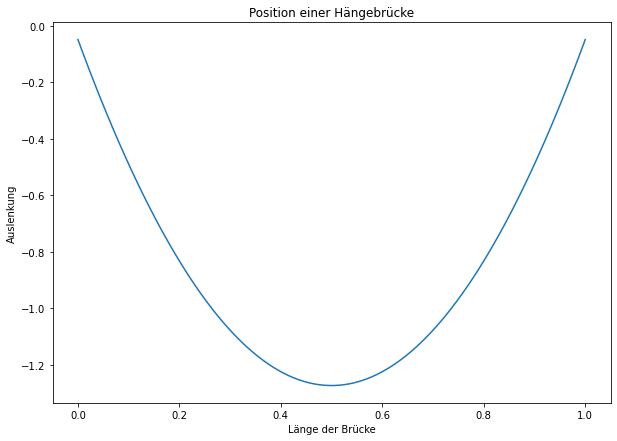

In [4]:
import matplotlib.pyplot as plt

# initialize vector with x-axis n evenly distributed values
# over the intervall [0,1] to match the n y-values generated
# by the linear equation
x = np.linspace(0, 1, n)

plt.figure(figsize=(10,7))   #enlarge plot
plt.plot(x, u)   # plot the x-values in x against the y-values in u
plt.title('Position einer Hängebrücke')
plt.xlabel('Länge der Brücke')
plt.ylabel('Auslenkung')
plt.show()

### Aufgabenteil 6

In [5]:
# Calculation of differences between the numeric solution
# and the analytic solution at the specified points
diffAnaNum = x - U(x)
diffAnaNum

array([0.        , 0.06009591, 0.11917151, 0.17722681, 0.23426181,
       0.2902765 , 0.34527089, 0.39924498, 0.45219876, 0.50413223,
       0.5550454 , 0.60493827, 0.65381084, 0.7016631 , 0.74849505,
       0.7943067 , 0.83909805, 0.88286909, 0.92561983, 0.96735027,
       1.0080604 , 1.04775023, 1.08641975, 1.12406897, 1.16069789,
       1.1963065 , 1.23089481, 1.26446281, 1.29701051, 1.3285379 ,
       1.359045  , 1.38853178, 1.41699827, 1.44444444, 1.47087032,
       1.49627589, 1.52066116, 1.54402612, 1.56637078, 1.58769513,
       1.60799918, 1.62728293, 1.64554637, 1.66278951, 1.67901235,
       1.69421488, 1.7083971 , 1.72155902, 1.73370064, 1.74482196,
       1.75492297, 1.76400367, 1.77206408, 1.77910417, 1.78512397,
       1.79012346, 1.79410264, 1.79706152, 1.7990001 , 1.79991838,
       1.79981635, 1.79869401, 1.79655137, 1.79338843, 1.78920518,
       1.78400163, 1.77777778, 1.77053362, 1.76226916, 1.75298439,
       1.74267932, 1.73135394, 1.71900826, 1.70564228, 1.69125

In [6]:
# calculation of the norm of the differences
np.linalg.norm(diffAnaNum)

14.088763790142277

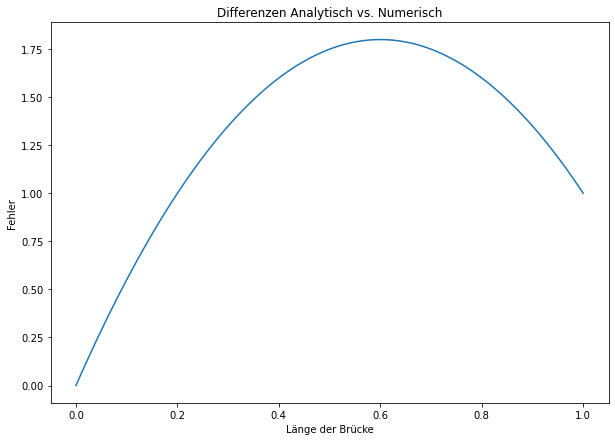

In [7]:
# plotting the differences with the specified points on the x-axis
# and the differences on the y-axis

plt.figure(figsize=(10,7))   #enlarge plot
plt.plot(x, diffAnaNum)   # plot the x-values in x against the y-values in u
plt.title('Differenzen Analytisch vs. Numerisch')
plt.xlabel('Länge der Brücke')
plt.ylabel('Fehler')
plt.show()

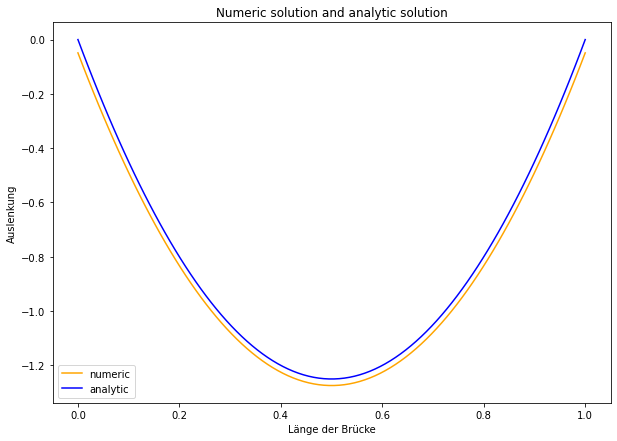

In [8]:
# plain plotting of the numeric solution vs the analytic solution
plt.figure(figsize=(10,7))
plt.plot(x, u, color = 'orange',label="numeric")
plt.plot(x, U(x), color ='blue', label="analytic")
plt.title('Numeric solution and analytic solution')
plt.xlabel('Länge der Brücke')
plt.ylabel('Auslenkung')
plt.legend()
plt.show()

Finished!